In [54]:
from IPython.display import HTML
HTML('''<style>.CodeMirror{min-width:100% !important;}</style>''')


# Equity Research

An equity research analyst is a professional who evaluates public companies and provides recommendations on whether to buy, sell, or hold their stocks.

**Buy-Side Analysts** work for institutional investors such as hedge funds and asset managers. Their primary objective is to identify profitable investment opportunities that align with their firm’s strategy. They conduct in-depth research, build financial models, and analyze market trends to support portfolio managers in making buy, hold, or sell decisions. Unlike sell-side analysts, their research is proprietary, used internally to maximize returns rather than being published for external clients.

**Sell-side Analysts** work for brokerage firms and investment banks, where they provide research reports, stock recommendations, and earnings forecasts to institutional and retail investors. Their role involves analyzing companies, forecasting earnings, and publishing reports with investment ratings (e.g., buy, hold, or sell). These insights help institutional and retail investors make informed decisions and also support their firm’s trading desks and investment banking activities. Unlike buy-side analysts, sell-side analysts focus on generating market insights and often engage with clients and media to discuss their findings.

Today we are going to put ourselves in the shoes of a **Sell-Side** Equity Analyst. 

We are going to look at some of the tools we can use in Python to assist in building an equity research report for publication.
We are not so much focussed on the process of formulating the analysis such as building a DCF.
Rather we want to learn how to use the tools that can automate some of the work we may do as an analyst.

**Step 1** will be to create a few handy functions

**Step 2** will be to pull in some live data from an application programming interface (API)

**Step 3** will be to scrape data from a website

**Step 4** will be to learn how to apply some Python functionality to this data, including the functions we have created and creating some graphs

**Step 5** will be to create a pdf file and import a csv file into Python

# Create some handy functions
Here we are going to create some functions that we can call to do some calculations

In [1]:
# Function to calculate the P/E ratio of a stock
def calculate_pe_ratio(price, earnings):
    return price / earnings

In [2]:
# Function to calculate the dividend yield of a stock
def calculate_dividend_yield(dividend, price):
    return dividend / price

In [3]:
# Function to calculate the earnings per share of a stock
def calculate_eps(net_income, shares_outstanding):
    return net_income / shares_outstanding

In [4]:
# Function to calculate ROA of a stock
def calculate_roa(net_income, total_assets):
    return net_income / total_assets

# Application Programming Interfaces (APIs)

### Introducing APIs
 - An Application Programming Interface (API) is the means by which a computer program can interact with a service over the internet. 

 ![Slide Image](images/API%20Diagram.jpg)
 

### Why use APIs?

- While we can use the browser (User Interface) in the simplest instance, implementing APIs into our program has many benefits:
  - **Streamlining:** Sourcing data from websites, downloading the data in .csv format, and reading into our model requires a great deal of human labour (time costly and susceptible to human error). Accessing the data through an API directly is a much more streamline process.
  - **Replicability:** If we write the API calls into our program dynamically, the model can update with new data in a single click. The source of this data is always known.
  - **Customisability:** The data inputs can be altered to suit updated needs

### Requests Python Library

- “Requests” is a python library that enables interaction with REST APIs
- The following are the main commands (“methods”) that are issued to a REST API:
  - GET
  - POST
  - PUT
  - DELETE
- GET is the method we are going to be interested in since it enables us to retrieve data from a service
- To install requests into your python environment, type the following at the terminal

  - pip install requests

![Slide Image](images/Requests.jpg)

### Examples of APIs
#### Weather API
Open Meteo is a free and open-source weather data API that provides access to real-time and historical weather data for locations around the world. It offers a range of weather data, including temperature, humidity, wind speed, and precipitation. This code uses a user input for latitude and longitude and uses a GET request to retrieve the weather data.

In [5]:
import requests
import pandas as pd

# Ask user for latitude and longitude (e.g., Sydney is -33.891228, 151.19585)
latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

# We construct a URL that is specific to the latitude and longitude the user inputted.
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'
response = requests.get(url)    # We can then query this URL using a GET request
data = response.json()          # Format the response to json

current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])

Weather information at -33.891228,151.19585


,values
time,2025-02-20T08:00
interval,900
temperature,20.6
windspeed,18.1
winddirection,159
is_day,1
weathercode,3


#### Joke of the Day API
The "Official Joke API" is a free, public REST API that provides random jokes in JSON format. You can use it to retrieve jokes programmatically.

In [ ]:
url = "https://official-joke-api.appspot.com/random_joke"
response = requests.get(url)

joke = response.json()
print(f"{joke['setup']} \n{joke['punchline']}")

How do the trees get on the internet? 
They log on.


### yfinance API
yfinance is a Python library that allows you to download financial data from Yahoo Finance. It provides a simple and convenient way to access historical stock prices, dividend data, and other financial data for publicly traded companies. With yfinance, you can easily download data for multiple stocks at once and perform analysis on the data using popular Python libraries like Pandas and Matplotlib.

We will start by using our previously defined functions to produce some ratios and indicators for the stock.

In [5]:
import yfinance as yf

# Take user input for ticker
TICKER = input('Enter a stock ticker (e.g. BHP.AX): ').upper()

try:
    # Get stock information
    stock = yf.Ticker(TICKER)
    stock_prices = stock.history(period="10y")
    stock_info = stock.info
    stock_financials = stock.financials
    stock_balance_sheet = stock.balance_sheet

    # Extract relevant information
    last_price = stock_prices['Close'].iloc[-1]
    earnings = stock_financials.loc["Net Income"].iloc[0]
    dividend = stock_info['lastDividendValue']
    shares_outstanding = stock_info['sharesOutstanding']
    total_assets = (stock_balance_sheet.loc["Total Assets"].iloc[0] + stock_balance_sheet.loc["Total Assets"].iloc[1]) / 2

    dividend_yield = calculate_dividend_yield(dividend, last_price) * 100
    eps = calculate_eps(earnings, shares_outstanding)
    pe_ratio = calculate_pe_ratio(last_price, eps)
    roa = calculate_roa(earnings, total_assets) * 100

except Exception as e:
    print(f"Error: {e}")

print(f"Chosen Stock: {TICKER} \nLast Share Price: {last_price:.2f} \nPE Ratio: {pe_ratio:.2f} \nDividend Yield: {dividend_yield:.2f}% \nEPS: {eps:.2f} \nROA: {roa:.2f}%")


Chosen Stock: BHP.AX 
Last Share Price: 40.62 
PE Ratio: 26.08 
Dividend Yield: 2.73% 
EPS: 1.56 
ROA: 7.76%


Now we will use the matplotlib package to graph the share price of our chosen stock.

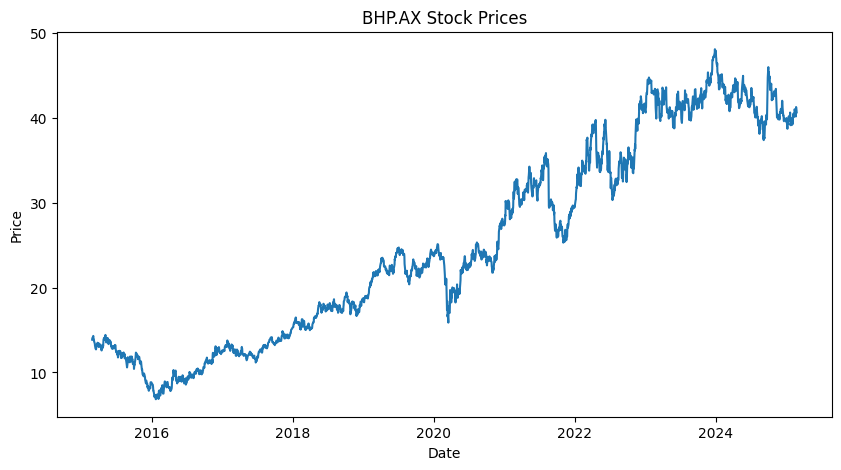

In [7]:
import matplotlib.pyplot as plt

# Plot the stock prices
plt.figure(figsize=(10, 5))
plt.plot(stock_prices['Close'])
plt.title(f"{TICKER} Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

We can convert this code into a function which will allow us to run it on any stock.

In [20]:
def calculate_ratios(ticker):
    import yfinance as yf
    import pandas as pd
    import matplotlib.pyplot as plt

    
    # Initialize variables with default values
    last_price = None
    earnings = None
    dividend = None
    shares_outstanding = None
    total_assets = None

    try:
        # Get stock information
        stock = yf.Ticker(ticker)
        stock_prices = stock.history(period="10y")
        stock_info = stock.info
        stock_financials = stock.financials
        stock_balance_sheet = stock.balance_sheet

        # Extract relevant information
        if not stock_prices.empty:
            last_price = stock_prices['Close'].iloc[-1]
        else:
            print("Historical price data is empty.")
        
        # Check if financials DataFrame has "Net Income" in its index
        if not stock_financials.empty and "Net Income" in stock_financials.index:
            earnings = stock_financials.loc["Net Income"].iloc[0]
        else:
            print("Financials data missing 'Net Income'.")
        
        if "lastDividendValue" in stock_info:
            dividend = stock_info['lastDividendValue']
        else:
            print("Dividend information not available.")
        
        if "sharesOutstanding" in stock_info:
            shares_outstanding = stock_info['sharesOutstanding']
        else:
            print("Shares outstanding not available.")
        
        # Check if balance sheet has "Total Assets" in its index
        if not stock_balance_sheet.empty and "Total Assets" in stock_balance_sheet.index:
            total_assets_series = stock_balance_sheet.loc["Total Assets"]
            if len(total_assets_series) >= 2:
                total_assets = (total_assets_series.iloc[0] + total_assets_series.iloc[1]) / 2
            else:
                total_assets = total_assets_series.iloc[0]
        else:
            print("Balance sheet data missing 'Total Assets'.")
        
        # Now print the calculated metrics if available.
        print(f"Chosen Stock: {ticker.upper()}")
        if last_price is not None:
            print(f"Last Share Price: {last_price:.2f}")
            if dividend is not None:
                dividend_yield = calculate_dividend_yield(dividend, last_price) * 100
                print(f"Dividend Yield: {dividend_yield:.2f}%")
        if earnings is not None and shares_outstanding is not None:
            eps = calculate_eps(earnings, shares_outstanding)
            print(f"EPS: {eps:.2f}")
            if last_price is not None:
                pe_ratio = calculate_pe_ratio(last_price, eps)
                print(f"PE Ratio: {pe_ratio:.2f}")
        if earnings is not None and total_assets is not None:
            roa = calculate_roa(earnings, total_assets) * 100
            print(f"ROA: {roa:.2f}%")

        if not stock_prices.empty:
            # Plot the stock prices
            plt.figure(figsize=(10, 5))
            plt.plot(stock_prices['Close'])
            plt.title(f"{ticker} Stock Price Over Time")
            plt.xlabel("Date")
            plt.ylabel("Price")
            plt.show()
    
    except Exception as e:
        print(f"Error: {e}")


## Pandas read_html() function

Pandas provides a `read_html()` function that allows you to extract tables from HTML web pages and convert them into Pandas DataFrames. This function is particularly useful for web scraping tasks where you need to extract data from HTML tables on a web page. The `read_html()` function can automatically detect and parse HTML tables from a web page and return them as a list of DataFrames. You can then manipulate the DataFrames using Pandas to perform further analysis or export the data to other formats.

In [ ]:
# We will use read_html() to scrape the constituent stocks of the ASX200 index from Wikipedia
asx200 = "https://en.wikipedia.org/wiki/S%26P/ASX_200"
data = pd.read_html(asx200)

for table in data:
    if "Company" in table.columns:
        asx200_constituents = table
        break

asx200_constituents = asx200_constituents["Company"]
asx200_constituents.head()

0          a2 Milk Company
1                    Adbri
2    Abacus Property Group
3               AGL Energy
4         Auckland Airport
Name: Company, dtype: object

## IPyWidgets

IPyWidgets is a Python library that allows you to create interactive widgets in Jupyter Notebooks. These widgets enable users to interact with your code visually without having to manually rerun cells, making your notebooks more dynamic and user-friendly.

The provided code demonstrates how to create and use interactive widgets to input a stock code, trigger a function to calculate financial ratios, and display the results. 

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget
stock_code_input = widgets.Text(
    value='',
    placeholder='Stock code',
    description='Stock code:',
    disabled=False
)

# Create a button widget
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

# Create an output widget
output = widgets.Output()

# Define the function to handle button click
def on_button_click(b):
    with output:
        output.clear_output()
        stock_code = stock_code_input.value

        calculate_ratios(stock_code)

# Attach the function to the button click event
submit_button.on_click(on_button_click)

# Display the widgets
display(stock_code_input, submit_button, output)

Text(value='', description='Stock code:', placeholder='Stock code')

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

## Reading Files Into Python

We can read different types of files into Python. This section will show two ways of reading files, including a .txt file and a .csv file.

In [23]:
# Read commentary from a text file
commentary = ""
with open("example_files/commentary.txt", "r") as file:
    commentary = file.read()

print(commentary)

# Read data from a CSV file
options_data = pd.read_csv("example_files/spx_options_combined.csv")
print(options_data.head())

On track for 2030 and long term decarb targets: BHP has delivered strong results in the last two years with decarbonisation achieved
ahead of its net zero trajectory. However, the company has highlighted uncertainties in the medium to longer term, as further GHG reduction
would rely on new technologies that are not available yet. While organic growth presents a headwind for decarbonisation, BHP expects the additional emissions to be more than offset by new renewable
Power Purchase Agreements. The capital commitment of ~US$4b is a nominal value, and we see upside risk to the Capex commitment given
uncertainness of future technology availability and inflation pressures.
Clarity on asset-level plans: The update provided further clarity on decarbonisation plans at the asset level, which we believe would be
well-received by the market. Chilean operations will focus on diesel displacement at its boilers and truck fleet, while Australian assets will
prioritise renewable power purchasing and d

## FPDF

FPDF is a lightweight Python library that enables you to programmatically create PDF documents. It allows for adding pages, custom headers and footers, formatted text, images, and more. With FPDF, you can  generate professional reports directly from Python code.


In [24]:
from fpdf import FPDF

# Define a custom PDF class with header and footer methods
class PDF(FPDF):
    def header(self):
        # Set the font for the header
        self.set_font('Arial', 'B', 15)
        # Move to the right
        self.cell(80)
        # Add the title cell; the parameters define width, height, text, border, position, and alignment
        self.cell(30, 10, 'Python PDF Creation Demo', 0, 0, 'C')
        # Line break with height 20
        self.ln(20)

    def footer(self):
        # Position 15 mm from the bottom
        self.set_y(-15)
        # Set the font for the footer
        self.set_font('Arial', 'I', 8)
        # Add a centred page number
        page_no = f'Page {self.page_no()}'
        self.cell(0, 10, page_no, 0, 0, 'C')

# Create an instance of our PDF class
pdf = PDF()
pdf.alias_nb_pages()  # Allows total page numbers to be referenced if needed
pdf.add_page()        # Add the first page

# Set font for the main content
pdf.set_font('Times', '', 12)

# Add a centered title cell
pdf.cell(0, 10, 'Welcome to the Python PDF Demo!', 0, 1, 'C')

# Add multi-line text using multi_cell for automatic wrapping
text = (
    "This is a demo PDF created using Python's FPDF library. "
    "In this document, we demonstrate multiple functionalities including:\n\n"
    "- Custom headers and footers with page numbering\n"
    "- Multi-line text formatting using multi_cell\n"
    "- Multiple pages\n\n"
    "FPDF makes it easy to generate PDF files programmatically, "
    "allowing you to customize layouts, add text, images, tables, and more."
)
pdf.multi_cell(0, 10, text)

# Add a second page with additional content
pdf.add_page()
pdf.set_font('Times', '', 12)
pdf.cell(0, 10, 'Second Page Content', 0, 1, 'C')
additional_text = (
    "Here is some more content on the second page. "
    "You can continue to add more pages as needed to complete your report or document. "
    "FPDF is a powerful tool for creating dynamic PDF documents using Python."
)
pdf.multi_cell(0, 10, additional_text)

# Save the PDF to a file
output_filename = "example_files/demo.pdf"
try:
    pdf.output(output_filename)
    print(f"PDF '{output_filename}' created successfully!")
except Exception as e:
    print("An error occurred while creating the PDF:", e)


PDF 'example_files/demo.pdf' created successfully!


## Reading Excel Files with Pandas
Pandas provides a highly efficient and flexible way to read Excel files into DataFrames, allowing you to easily manipulate and analyse your data in Python. The process involves using the read_excel function, which offers a range of parameters to customize how data is imported. You can specify the file path, select a particular worksheet, choose specific columns, skip unnecessary rows, and limit the number of rows to read. This flexibility makes it possible to focus on just the relevant parts of your data.



In [52]:
import pandas as pd

# Read the excel file
df = pd.read_excel('example_files/DCF_test.xlsx', sheet_name="Sheet1", usecols='A:L', skiprows=0, nrows=4)

# We can check if Python and Excel achieve the same NPV value

excel_npv = df.iloc[-1,1] # get the NPV value from the last row and second column

python_npv = sum(df.iloc[0, 1:] * df.iloc[1, 1:]) # calculate the NPV using Python

print(f'Excel NPV: {excel_npv:,.2f}')
print(f'Python NPV: {python_npv:,.2f}')


Excel NPV: 34,410.25
Python NPV: 34,410.25
